In [1]:
#test the model class on JSWT simulations 
import numpy as np
import pandas as pd
#import splat
#import popsims
from astropy.coordinates import SkyCoord, Galactic
#from popsims.galaxy import Pointing, volume_calc, create_pop
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
#sns.set_style("darkgrid", {"axes.facecolor": ".95"})

#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')

from  matplotlib.colors import Normalize
import astropy.units as u
import popsims
import matplotlib
from tqdm import tqdm
from tqdm import tqdm
import matplotlib as mpl 
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] =20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['figure.titlesize'] = 20

from popsims.simulator import Population,simulate_population
from popsims.galaxy import Disk, Halo
from popsims.relations import polynomial_relation
from popsims.backgrounds import simulate_lsst_background_stars, read_isochrones

/users/caganze/research/popsims/popsims/galaxy.py:32: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "get_distance" failed type inference due to: NameError: name 'rel_mag' is not defined
  @numba.vectorize("float64(float64, float64)", target='cpu')

/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "get_distance" was compiled in object mode without forceobj=True.

File "../../../../../users/caganze/research/popsims/popsims/galaxy.py", line 33:
@numba.vectorize("float64(float64, float64)", target='cpu')
def get_distance(absmag, appmag):
^

  warnings.warn(errors.NumbaWarning(warn_msg,

/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https

In [2]:
popsims.simulator.POLYNOMIALS['absmags_spt']['subdwarfs']

{'LSST_R': {'x': 'spt',
  'y': 'r',
  'fit': poly1d([ 1.54685898e-04, -1.29324658e-02,  3.57847261e-01, -3.03922048e+00,
          1.41042905e+01]),
  'scatter': 0.3231691584886805,
  'method': 'polynomial',
  'range': (10.0, 39.27272727272727),
  'x0': 0},
 'LSST_I': {'x': 'spt',
  'y': 'i',
  'fit': poly1d([ 9.59173377e-05, -8.19766658e-03,  2.31343496e-01, -1.84351726e+00,
          9.61374781e+00]),
  'scatter': 0.25631647628534543,
  'method': 'polynomial',
  'range': (10.0, 39.27272727272727),
  'x0': 0},
 'LSST_Z': {'x': 'spt',
  'y': 'z',
  'fit': poly1d([ 8.65829382e-05, -7.51332981e-03,  2.12134215e-01, -1.65696895e+00,
          7.70321176e+00]),
  'scatter': 0.2522328775529524,
  'method': 'polynomial',
  'range': (10.0, 39.27272727272727),
  'x0': 0}}

In [3]:
#bhjk

In [4]:
#LOAD DP0 data
dp0_data=pd.read_csv('/Volumes/lacie/popsimsdata/cone_search.csv')

In [5]:
#randoom 1,000 poinitings
dp0_data_rand= dp0_data.sample(n=1000)
footprint=SkyCoord(ra=dp0_data_rand.ra*u.deg, dec=dp0_data_rand.dec*u.deg)

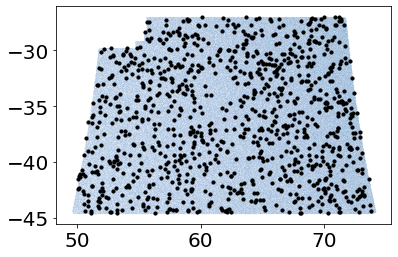

In [6]:
fig, ax=plt.subplots()
ax.scatter(dp0_data.ra, dp0_data.dec, s=.1, alpha=0.02)
ax.scatter(footprint.ra, footprint.dec, s=10, c='k')

In [7]:
#simulate a disk population
mag_keys=['LSST_R', 'LSST_I', 'LSST_Z' ]

In [8]:
mag_keys

['LSST_R', 'LSST_I', 'LSST_Z']

In [9]:
bckg=pd.concat([simulate_lsst_background_stars(1e2, imf='kroupa', mass_range=(0.1, 1), \
                                               met_range=(0.0, 0.5)) for i in tqdm(range(0, 10))])

 10%|████████████                                                                                                             | 1/10 [00:04<00:38,  4.24s/it]

/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/astropy/coordinates/baseframe.py:1210: AstropyDeprecationWarning: Transforming a frame instance to a frame class (as opposed to another frame instance) will not be supported in the future.  Either explicitly instantiate the target frame, or first convert the source frame instance to a `astropy.coordinates.SkyCoord` and use its `transform_to()` method.
  warnings.warn("Transforming a frame instance to a frame class (as opposed to another "



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.20s/it]


In [10]:
#bckg

In [11]:
disk= Disk()
samples_tot= simulate_population(disk, footprint, 0.1, 15000, poptype='dwarfs', mag_keys=mag_keys, \
                             galtype='thin_disk', nsample=5e4, get_from='spt')

/users/caganze/research/popsims/popsims/tools.py:146: RuntimeWarning: Mean of empty slice
  res=np.nanmean(res, axis=0)

/users/caganze/research/popsims/popsims/tools.py:150: RuntimeWarning: Mean of empty slice
  return np.nanmean(res, axis=0), np.nanstd(res, axis=0)

/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:24<00:00, 11.89it/s]


['LSST_R', 'LSST_I', 'LSST_Z']
['LSST_R', 'LSST_I', 'LSST_Z']
['LSST_R', 'LSST_I', 'LSST_Z']
          LSST_R  abs_LSST_R     LSST_I  abs_LSST_I     LSST_Z  abs_LSST_Z
0      36.728298   26.787619  34.795610   24.854930  33.080233   23.139554
1      30.990786   22.747186  29.471185   21.227584  26.728286   18.484685
2      38.650379   27.012621  36.969473   25.331714  36.058994   24.421236
3            NaN         NaN        NaN         NaN        NaN         NaN
4      30.479949   22.236348  28.699132   20.455532  26.353251   18.109651
...          ...         ...        ...         ...        ...         ...
12495        NaN         NaN        NaN         NaN        NaN         NaN
12496  31.022757   20.657808  28.458517   18.093568  26.862753   16.497804
12497        NaN         NaN        NaN         NaN        NaN         NaN
12498  29.612240   19.671560  26.962542   17.021862  25.595937   15.655257
12499        NaN         NaN        NaN         NaN        NaN         NaN

[62500

In [12]:
mag_keys

['LSST_R', 'LSST_I', 'LSST_Z']

In [13]:
#thick disk
disk= Disk(H=300, L=3600)
samples_thick_tot= simulate_population(disk, footprint, 0.1, 15000, poptype='subdwarfs', \
                                   galtype='thick_disk' , mag_keys=mag_keys, evolmodel='burrows1997',\
                                   age_range=[8, 13], nsample=5e4, get_from='spt')

/users/caganze/research/popsims/popsims/tools.py:146: RuntimeWarning: Mean of empty slice
  res=np.nanmean(res, axis=0)

/users/caganze/research/popsims/popsims/tools.py:150: RuntimeWarning: Mean of empty slice
  return np.nanmean(res, axis=0), np.nanstd(res, axis=0)

/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:24<00:00, 11.80it/s]


['LSST_R', 'LSST_I', 'LSST_Z']
['LSST_R', 'LSST_I', 'LSST_Z']
['LSST_R', 'LSST_I', 'LSST_Z']
          LSST_R  abs_LSST_R     LSST_I  abs_LSST_I     LSST_Z  abs_LSST_Z
0      41.380022   29.742263  36.330679   24.692921  31.313502   19.675743
1      29.591020   20.074611  26.895373   17.378963  24.725874   15.209464
2      32.834356   22.893677  30.174259   20.233579  27.157524   17.216844
3      28.440194   16.802435  25.828814   14.191055  23.922106   12.284348
4      34.690540   27.295479  30.609712   23.214651  26.366964   18.971903
...          ...         ...        ...         ...        ...         ...
12495        NaN         NaN        NaN         NaN        NaN         NaN
12496        NaN         NaN        NaN         NaN        NaN         NaN
12497  24.885174   14.520225  22.754317   12.389368  20.962265   10.597316
12498        NaN         NaN        NaN         NaN        NaN         NaN
12499        NaN         NaN        NaN         NaN        NaN         NaN

[62500

In [14]:
#### thick disk
halo=Halo()
samples_halo_tot= simulate_population(halo, footprint, 0.1, 15000, poptype='subdwarfs', galtype='halo', \
                                   age_range=[10, 14], mag_keys=mag_keys,  evolmodel='burrows1997',
                                  nsample=5e4, get_from='spt')

/users/caganze/research/popsims/popsims/tools.py:146: RuntimeWarning: Mean of empty slice
  res=np.nanmean(res, axis=0)

/users/caganze/research/popsims/popsims/tools.py:150: RuntimeWarning: Mean of empty slice
  return np.nanmean(res, axis=0), np.nanstd(res, axis=0)

/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:33<00:00, 10.66it/s]


['LSST_R', 'LSST_I', 'LSST_Z']
['LSST_R', 'LSST_I', 'LSST_Z']
['LSST_R', 'LSST_I', 'LSST_Z']
          LSST_R  abs_LSST_R     LSST_I  abs_LSST_I     LSST_Z  abs_LSST_Z
0            NaN         NaN        NaN         NaN        NaN         NaN
1            NaN         NaN        NaN         NaN        NaN         NaN
2            NaN         NaN        NaN         NaN        NaN         NaN
3      28.708892   12.828435  26.649902   10.769445  25.439817    9.559361
4            NaN         NaN        NaN         NaN        NaN         NaN
...          ...         ...        ...         ...        ...         ...
12495        NaN         NaN        NaN         NaN        NaN         NaN
12496        NaN         NaN        NaN         NaN        NaN         NaN
12497  30.074277   14.193820  28.091144   12.210688  26.466422   10.585966
12498        NaN         NaN        NaN         NaN        NaN         NaN
12499        NaN         NaN        NaN         NaN        NaN         NaN

[62500

In [15]:
# u : 23.9,  26.1
#g : 25.0,  27.4
#r : 24.7, 27.5
#i : 24.0 , 26.8
#z : 23.3,  26.1
#y : 22.1, 24.9
mag_limits_single=dict(zip(mag_keys, [25.0, 24.7, 24.0, 23.3, 22.1]))
mag_limits_10yr=dict(zip(mag_keys, [27.4, 27.5, 26.8, 26.1, 24.9]))
mag_limits= mag_limits_single

In [16]:
for k in [ 'LSST_R', 'LSST_I', 'LSST_Z']:
    print (k, mag_limits[k])
    samples= samples_tot[np.logical_and(samples_tot[k]<mag_limits[k], samples_tot[k] >1) ].reset_index(drop=True)
    samples_thick= samples_thick_tot[np.logical_and(samples_thick_tot[k]<mag_limits[k], samples_thick_tot[k]>1)].reset_index(drop=True)
    samples_halo= samples_halo_tot[np.logical_and(samples_halo_tot[k]<mag_limits[k], samples_halo_tot[k]>1) ].reset_index(drop=True)
    bckg= bckg[np.logical_and(bckg[k]<mag_limits[k], bckg[k] >10)].reset_index(drop=True)

LSST_R 25.0
LSST_I 24.7
LSST_Z 24.0


In [17]:
for s in [samples, samples_thick, samples_halo, bckg]:
    #s['g-r']=s.abs_LSST_G-s.abs_LSST_R
    s['i-z']=s.abs_LSST_I-s.abs_LSST_Z
    s['r-i']=s.abs_LSST_R-s.abs_LSST_I
    #s['z-y']=s.abs_LSST_Z-s.abs_LSST_Y
    #s['g-i']=s.abs_LSST_G-s.abs_LSST_I
    s['r-z']=s.abs_LSST_R-s.abs_LSST_Z
    

In [18]:
#bckg= bckg[np.logical_and(bckg['i-z']>0, bckg['r-i']>0)]

/var/folders/p5/jqfspzln0z965dsfd1pj_5900000gp/T/ipykernel_43942/3975020805.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('../figures/lsst_dp0_simulations_ri_iz.jpeg')

/Users/caganze/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)



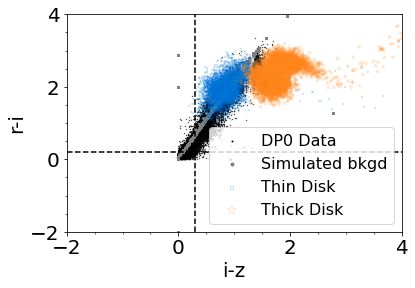

In [19]:
fig, ax=plt.subplots()


ax.scatter(dp0_data.mag_i-dp0_data.mag_z, dp0_data.mag_r-dp0_data.mag_i, color='k', label='DP0 Data', s=.1)
ax.scatter(bckg['i-z'], bckg['r-i'], color='grey', label='Simulated bkgd', s=1)

ax.scatter(samples['i-z'], samples['r-i'], s=1, marker=',', \
           edgecolor='#0074D9',  facecolor='none', alpha=0.2, label='Thin Disk')
ax.scatter(samples_thick['i-z'], samples_thick['r-i'], alpha=0.2, s=10,\
           edgecolor='#FF851B', facecolor='none', marker='*', label='Thick Disk')
#ax.scatter(samples_halo['i-z'], samples_halo['r-i'],  s=10,\
#           edgecolor='#B10DC9',  facecolor='none', alpha=0.2, marker='*', label='Halo')

ax.axvline(0.3, linestyle='--', color='k')
ax.axhline(0.2, linestyle='--', color='k')

ax.minorticks_on()
ax.legend(fontsize=16, markerscale=3)

ax.set(xlim=[-2, 4.], ylim=[-2, 4.0], xlabel='i-z', ylabel='r-i')

plt.savefig('../figures/lsst_dp0_simulations_ri_iz.jpeg')

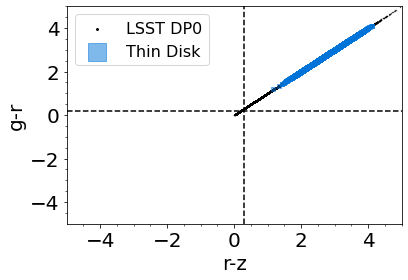

In [20]:
fig, ax=plt.subplots()

ax.scatter(dp0_data.mag_r-dp0_data.mag_z, dp0_data.mag_r-dp0_data.mag_z, color='k', label='LSST DP0', s=.1)
#ax.scatter(bckg['r-i'], bckg['g-r'], color='grey', label='Simulated bkgd', s=10)

ax.scatter(samples['r-z'][samples.spt<20], samples['r-z'][samples.spt<20],  s=10, marker=',', alpha=0.5, color='#0074D9',  label='Thin Disk')
#ax.scatter(samples_thick['r-z'], samples_thick['g-r'], s=10, marker='*', color='#FF851B',  label='Thick Disk')
#ax.scatter(samples_halo['r-z'], samples_halo['g-r'],  s=10, marker='*', color='#B10DC9', label='Halo')

ax.axvline(0.3, linestyle='--', color='k')
ax.axhline(0.2, linestyle='--', color='k')

ax.minorticks_on()
legend=ax.legend(fontsize=16, markerscale=6)

ax.set( xlabel='r-z', ylabel='g-r', xlim=[-5, 5], ylim=[-5, 5.])

plt.savefig('../figures/lsst_dp0_simulations_rz_gr.jpeg')

In [21]:
#adsfvd

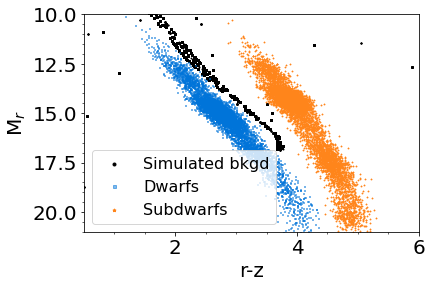

In [22]:
fig, ax=plt.subplots()

#ax.scatter(dp0_data.mag_r-dp0_data.mag_z, dp0_data.mag_g-dp0_data.mag_r, color='k', label='DP0 Data', s=.1)
ax.scatter(bckg.abs_LSST_R-bckg.abs_LSST_Z, bckg.abs_LSST_R, color='k', label='Simulated bkgd', s=1)

ax.scatter(samples['r-z'], samples.abs_LSST_R,  s=1, marker=',', alpha=0.5, color='#0074D9',  label='Dwarfs')
ax.scatter(samples_thick['r-z'], samples_thick.abs_LSST_R, s=1, marker='*', color='#FF851B',  label='Subdwarfs')
#ax.scatter(samples_halo['r-z'], samples_halo.abs_LSST_R, s=10, marker='*', color='#B10DC9', label='Halo')

#ax.axvline(0.3, linestyle='--', color='k')
#ax.axhline(0.2, linestyle='--', color='k')

ax.minorticks_on()
legend=ax.legend(fontsize=16, markerscale=3)

ax.set( xlabel='r-z', ylabel=r'M$_r$', xlim=[0.5, 6.], ylim=[10, 21])
ax.invert_yaxis()


In [23]:
bckg.columns

Index(['mass', 'logage', 'abs_LSST_U', 'abs_LSST_G', 'abs_LSST_R',
       'abs_LSST_I', 'abs_LSST_Z', 'abs_LSST_Y', 'age', 'distance',
       'population', 'LSST_U', 'LSST_G', 'LSST_R', 'LSST_I', 'LSST_Z',
       'LSST_Y', 'r', 'z', 'l', 'b', 'U', 'V', 'W', 'RV', 'mu_alpha_cosdec',
       'mu_delta', 'Vr', 'Vphi', 'Vz', 'redH_LSST_U', 'redH_LSST_G',
       'redH_LSST_R', 'redH_LSST_I', 'redH_LSST_Z', 'redH_LSST_Y', 'i-z',
       'r-i', 'r-z'],
      dtype='object')

[Text(0.5, 0, 'r-z'), Text(0, 0.5, 'Spectral Type'), (0.5, 6.0), (10.0, 40.0)]

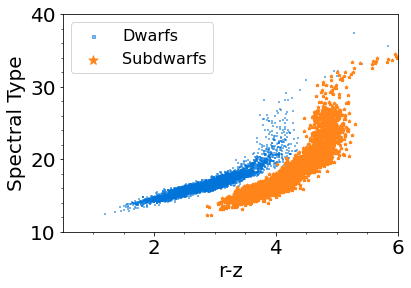

In [24]:
fig, ax=plt.subplots()

#ax.scatter(dp0_data.mag_r-dp0_data.mag_z, dp0_data.mag_g-dp0_data.mag_r, color='k', label='DP0 Data', s=.1)
#ax.scatter(bckg['r-z'], bckg['g-r'], color='grey', label='Simulated bkgd', s=1)

ax.scatter(samples['r-z'], samples.spt,  s=1, marker=',', alpha=0.5, color='#0074D9',  label='Dwarfs')
ax.scatter(samples_thick['r-z'], samples_thick.spt ,s=10, marker='*', color='#FF851B',  label='Subdwarfs')
#ax.scatter(samples_halo['r-z'], samples_halo.abs_LSST_R, s=10, marker='*', color='#B10DC9', label='Halo')

#ax.axvline(0.3, linestyle='--', color='k')
#ax.axhline(0.2, linestyle='--', color='k')

ax.minorticks_on()
legend=ax.legend(fontsize=16, markerscale=3)

ax.set( xlabel='r-z', ylabel=r'Spectral Type', xlim=[0.5, 6.], ylim=[10, 40])


In [25]:
def compute_vols_and_numbers(df, sptgrid, footprint, maglimits):
    counts={}
    vols={}
    dists={}
    
    disk= Disk()
    tdisk=  Disk(H=900, L=3600)
    halo= Halo()
    
    
    for spt in tqdm(sptgrid):
        
        dmins=[]
        dmaxs=[]
        
        dmins_sd=[]
        dmaxs_sd=[]
        
        for k in maglimits.keys():
            mag_cut= maglimits[k]
            absmag= np.poly1d(popsims.simulator.POLYNOMIALS['absmags_spt']['dwarfs'][k]['fit'])(spt)
            absmag_sd= np.poly1d(popsims.simulator.POLYNOMIALS['absmags_spt']['subdwarfs'][k]['fit'])(spt)
        
            mag_cut= maglimits[k]
            
            dmin=10.**(-(absmag-14)/5. + 1.)
            dmax=10.**(-(absmag-mag_cut)/5. + 1.)
            
            dmin_sd=10.**(-(absmag_sd-14)/5. + 1.)
            dmax_sd=10.**(-(absmag_sd-mag_cut)/5. + 1.)
            
            
            
            dmins.append(dmin)
            dmaxs.append(dmax)
            
            dmins_sd.append(dmin)
            dmaxs_sd.append(dmax)
            
        dmin=np.nanmedian(dmins)
        dmax=np.nanmedian(dmaxs)
        
        dmin_sd=np.nanmedian(dmins_sd)
        dmax_sd=np.nanmedian(dmaxs_sd)
        
        #print (spt, dmin, dmax)
        
        scale=[df.scale.mean(), df.scale_unc.mean(), df.scale_times_model.mean()]
        
        sn= len(df.query('population == "thin disk"'))
        snt= len(df.query('population == "thick disk"'))
        snh= len(df.query('population == "halo"'))
      
        sn_c= len(df.query('population == "thin disk" and spt >= {} and spt < {}'.format(spt, spt+0.9)))
        snt_c= len(df.query('population == "thick disk" and spt >= {} and spt < {}'.format(spt, spt+0.9)))
        snh_c= len(df.query('population == "halo" and spt >= {} and spt < {}'.format(spt, spt+0.9)))
        
        
        volumes={'thin': 0., 'thick':0., 'halo': 0.}
        
        cnts={'thin':  sn_c*np.divide(scale[-1], sn),
             'thick': snt_c*np.divide(scale[-1], snt),\
             'halo':  snh_c*np.divide(scale[-1], snh)}

        for s in  footprint:
            l=s.galactic.l.radian
            b=s.galactic.b.radian
            volumes['thin'] += disk.volume(l, b, dmin, dmax)/len(footprint)
            volumes['thick'] += tdisk.volume(l, b, dmin_sd, dmax_sd)/len(footprint)
            volumes['halo'] += halo.volume(l, b, dmin_sd, dmax_sd)/len(footprint)
            
        vols.update({spt: volumes})
        counts.update({spt: cnts})
        dists.update({spt: dmax})
        
        
    return pd.DataFrame.from_records(vols).T.replace(np.inf, np.nan),\
    pd.DataFrame.from_records(counts).T.replace(np.inf, np.nan),\
    dists


In [26]:
samples_tot['population']='thin disk'
samples_thick_tot['population']='thick disk'
samples_halo_tot['population']='halo'

In [27]:
mag_limits=mag_limits_single
for k in ['LSST_R', 'LSST_I', 'LSST_Z']:
    samples= samples_tot[np.logical_and(samples_tot[k]<mag_limits[k], samples_tot[k] >1) ].reset_index(drop=True)
    samples_thick= samples_thick_tot[np.logical_and(samples_thick_tot[k]<mag_limits[k], samples_thick_tot[k]>1)].reset_index(drop=True)
    samples_halo= samples_halo_tot[np.logical_and(samples_halo_tot[k]<mag_limits[k], samples_halo_tot[k]>1) ].reset_index(drop=True)
samples['population']='thin disk'
samples_thick['population']='thick disk'
samples_halo['population']='halo'
df= pd.concat([samples, samples_thick, samples_halo])
sptgrid=np.arange(15, 40)

#Add astrometric cut
#addd astrometric cut
astro_cut=(df.mu_alpha_cosdec**2+df.mu_delta**2)**0.5 >10
ns=compute_vols_and_numbers(df, sptgrid, footprint, mag_limits)
ns_astro=compute_vols_and_numbers(df[astro_cut], sptgrid, footprint, mag_limits)

mag_limits=mag_limits_10yr
for k in ['LSST_R', 'LSST_I', 'LSST_Z']:
    samples= samples_tot[np.logical_and(samples_tot[k]<mag_limits[k], samples_tot[k] >1) ].reset_index(drop=True)
    samples_thick= samples_thick_tot[np.logical_and(samples_thick_tot[k]<mag_limits[k], samples_thick_tot[k]>1)].reset_index(drop=True)
    samples_halo= samples_halo_tot[np.logical_and(samples_halo_tot[k]<mag_limits[k], samples_halo_tot[k]>1) ].reset_index(drop=True)
samples['population']='thin disk'
samples_thick['population']='thick disk'
samples_halo['population']='halo'
df= pd.concat([samples, samples_thick, samples_halo])
sptgrid=np.arange(15, 40)
ns_10yr=compute_vols_and_numbers(df, sptgrid, footprint, mag_limits)
astro_cut=(df.mu_alpha_cosdec**2+df.mu_delta**2)**0.5 >10
ns_10yr_astro=compute_vols_and_numbers(df[astro_cut], sptgrid, footprint, mag_limits)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [01:05<00:00,  2.63s/it]


In [29]:
AREA=(18_000*(u.degree**2).to(u.radian**2)*(u.radian**2))

In [30]:
def tick_function(locs):
    return [x*18_1000 for x in locs]

NameError: name 'new_tick_locations' is not defined

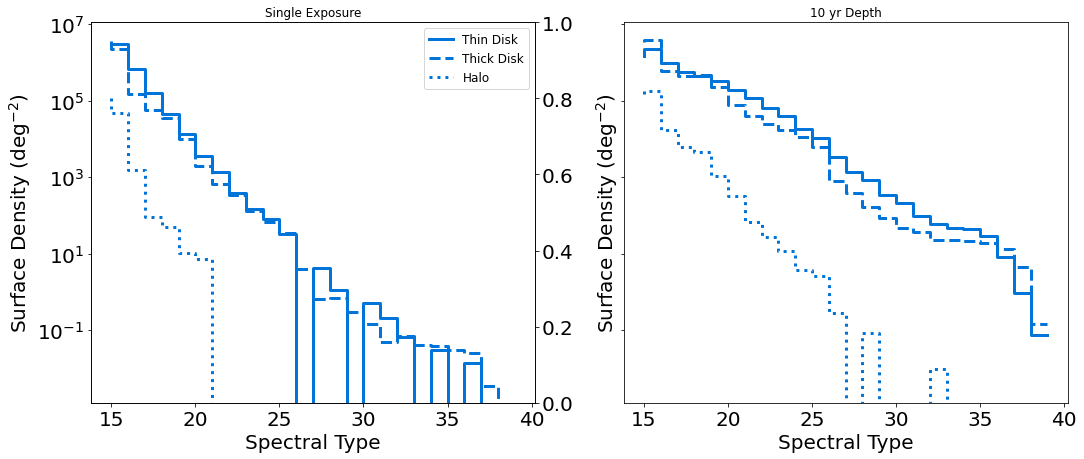

In [31]:
fig, ax=plt.subplots(figsize=(17.5, 7), ncols=2, sharey=True)

ax[0].step(ns[0].index, ns[0].thin*ns[1].thin*AREA,\
        color='#0074D9',  linestyle='-', label='Thin Disk', linewidth=3)
ax[0].step(ns[0].index, 0.12*ns[0].thick*ns[1].thick*AREA,\
         color='#0074D9',  linestyle='dashed', label='Thick Disk',  linewidth=3)
ax[0].step(ns[0].index, (1/400)*ns[0].thick*ns[1].halo*AREA,\
           color='#0074D9', linestyle='dotted', label='Halo',  linewidth=3)
ax[0].set(yscale='log', ylabel=r'Surface Density (deg$^{-2}$)', xlabel='Spectral Type', title='5-Sigma Depth')
ax[0].legend(fontsize=12)

ax[1].step(ns_10yr[0].index, ns_10yr[0].thin*ns_10yr[1].thin*AREA,\
        color='#0074D9',  linestyle='-', label='Thin Disk', linewidth=3)
ax[1].step(ns_10yr[0].index, 0.12*ns_10yr[0].thick*ns_10yr[1].thick*AREA,\
         color='#0074D9',  linestyle='dashed', label='Thick Disk', linewidth=3)
ax[1].step(ns_10yr[0].index, (1/400)*ns_10yr[0].thick*ns_10yr[1].halo*AREA,\
           color='#0074D9', linestyle='dotted', label='Halo', linewidth=3)
ax[1].set(yscale='log', ylabel=r'Surface Density (deg$^{-2}$)', xlabel='Spectral Type', title='10 yr Depth')


#ax[0].step(ns_astro[0].index, ns_astro[0].thin*ns_astro[1].thin*AREA,\
#        color='#FF851B',  linestyle='-', label='Thin Disk + Astrometric Detection', linewidth=3)
#ax[0].step(ns[0].index, 0.12*ns_astro[0].thick*ns_astro[1].thick*AREA,\
#         color='#FF851B',  linestyle='dashed', label='Thick Disk + Astrometric Detection',  linewidth=3)
#ax[0].step(ns[0].index, (1/400)*ns_astro[0].thick*ns_astro[1].halo*AREA,\
#           color='#FF851B', linestyle='dotted', label='Halo + Astrometric Detection',  linewidth=3)

ax[0].set(yscale='log', ylabel=r'Surface Density (deg$^{-2}$)', xlabel='Spectral Type', title='Single Exposure')
#ax[0].legend(fontsize=12)

#ax[1].step(ns_10yr[0].index, ns_10yr_astro[0].thin*ns_10yr_astro[1].thin*AREA,\
#        color='#FF851B',  linestyle='-', label='Thin Disk + Astrometric Detection', linewidth=3)
#ax[1].step(ns_10yr[0].index, 0.12*ns_10yr_astro[0].thick*ns_10yr_astro[1].thick*AREA,\
#         color='#FF851B',  linestyle='dashed', label='Thick Disk + Astrometric Detection', linewidth=3)
#ax[1].step(ns_10yr[0].index, (1/400)*ns_10yr_astro[0].thick*ns_10yr_astro[1].halo*AREA,\
#           color='#FF851B', linestyle='dotted', label='Halo + Astrometric Detection', linewidth=3)
#ax[1].set(yscale='log', ylabel=r'Surface Density (deg$^{-2}$)', xlabel='Spectral Type', title='10 yr Depth')

for a in ax :
    ax2 = a.twinx()
    #ax2.set_yticks(new_tick_locations)
    ax2.set_yticklabels(["{:.0e}".format(x) for x in new_tick_locations*18_0000])
    #ax2.tick_params(colors='#0074D9', which='both') 
    ax2.set_ylabel('Number Counts')
    #ax2.grid()


ax[1].legend(fontsize=12)
ax[1].yaxis.set_tick_params(labelbottom=True)
plt.tight_layout()
ax[0].set(xticks=[ 15,20, 25, 30, 35, 39], xticklabels=['M5', 'L0', 'L5', 'T0', 'T5', 'T9'])
ax[1].set(xticks=[15,20, 25, 30, 35, 39], xticklabels=['M5', 'L0', 'L5', 'T0', 'T5', 'T9'])
ax[0].minorticks_on()
ax[-1].minorticks_on()
plt.savefig('../figures/number_counts_lsst.jpeg')

In [ ]:
mask=np.logical_and(ns_10yr[0].index>=20, ns_10yr[0].index <30)
print ('L dwarfs with detectable motion')
np.nansum((ns_10yr_astro[0].thin*ns_10yr_astro[1].thin*AREA)[mask])

In [ ]:
mask=np.logical_and(ns_10yr[0].index>=30, ns_10yr[0].index <=40)
print ('L dwarfs with detectable motion')
np.nansum((ns_10yr_astro[0].thin*ns_10yr_astro[1].thin*AREA)[mask])

In [ ]:
bckg.age.min()

In [ ]:
import astropy.units as u
((32*u.arcmin)**2).to(u.deg**2)